# TP EPITA - 1. Clustering

Ce notebook contient notre code pour le TP de Kantar. Notre groupe est constitué de :
- Alexandre Devaux-Rivière
- Valentin San
- Maël Reynaud


---

### Imports

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None)

%matplotlib inline


---

# Clusterisation des 5000 individus en utilisant les variables en orange

In [95]:
df_codes = pd.read_csv('../data/fic_epita_kantar_codes.csv', delimiter=';')
df_codes

,cle,Respondent_ID,weight,A11,A12,A13,A14,A4,A5,A5bis,A8_1_slice,A8_2_slice,A8_3_slice,A8_4_slice,B1_1_slice,B1_2_slice,B2_1_slice,B2_2_slice,B3,B4,B6,C1_1_slice,C1_2_slice,C1_3_slice,C1_4_slice,C1_5_slice,C1_6_slice,C1_7_slice,C1_8_slice,C1_9_slice,A9_1_slice,A9_2_slice,A9_3_slice,A9_4_slice,A9_5_slice,A9_6_slice,A9_7_slice,A9_8_slice,A9_9_slice,A9_10_slice,A9_11_slice,A9_12_slice,A9_13_slice,A9_14_slice,A9_15_slice,A9_16_slice,A10_1_slice,A10_2_slice,A10_3_slice,A10_4_slice,A10_5_slice,A10_6_slice,A10_7_slice,A10_8_slice,A11_1_slice,A11_2_slice,A11_3_slice,A11_4_slice,A11_5_slice,A11_6_slice,A11_7_slice,A11_8_slice,A11_9_slice,A11_10_slice,A11_11_slice,A11_12_slice,A11_13_slice,A1bis,A2,A6_1_slice,A6_2_slice,A6_3_slice,A6_4_slice,A6_5_slice,A6_6_slice,A7,B5_1_slice,B5_2_slice,B5_3_slice,B5_4_slice,B5_5_slice,B5_6_slice,C201,C202,C203,C204,C205,C206,C207,C208,C209,C210,C211,C212,C213,C214,C215,C216,C217,C218,C219,C220,C301,C302,C303,C304,C305,C306,C307,C308,C309,C310,C311,C4_1_slice,C4_2_slice,C4_3_slice,C4_4_slice,rs3,rs5,rs6,RS1,RS191,RS192,RS193,RS102RECAP,rs11recap2,RS11recap,RS193bis,RS2Recap,RS56Recap,RS2,RS11,RS102
0,1,MET20_999999996,2.501255,1,0,0,0,1,2.0,NaN,2,2,2,2,2,2,2,2,2,2,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,100,0,0,0,0.0,0,45,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,2,2,1,1,5.0,1,1.0,2,2,4,1,2,NaN,1,1,24,0,4
1,2,MET20_98888888,0.722914,1,0,0,0,1,5.0,NaN,2,0,0,0,2,2,2,2,3,3,3,4,4,4,4,4,4,4,4,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,100,0,0,0,0.0,0,1,3,3,3,3,3,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,1,1,2.0,1,1.0,2,2,1,1,2,NaN,4,1,50,0,1
2,3,MET20_1978307,1.039611,1,0,0,0,1,2.0,NaN,5,5,1,1,2,2,2,3,3,3,4,4,4,4,4,4,4,4,4,4,3,2,2,2,3,2,2,2,2,2,2,3,2,3,2,2,2,2,3,2,2,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,80,0,5,5,0.0,10,5,3,4,4,4,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,6,7,7,1,1,9.0,2,1.0,1,2,3,2,1,NaN,3,2,37,1,3
3,4,MET20_1302078,0.976590,1,1,1,0,1,1.0,NaN,2,3,2,1,4,3,4,3,3,4,4,4,4,5,5,5,5,5,4,4,1,2,2,2,3,2,3,2,1,2,1,3,3,1,2,3,2,2,3,2,2,3,2,3,2,2,1,2,1,2,3,3,3,2,2,1,2,1,1,30,5,25,15,20.0,5,25,3,4,4,4,4,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,7,7,7,2,3,NaN,2,1.0,2,2,2,1,2,NaN,5,3,63,0,2
4,5,MET20_1869308,0.812315,0,1,0,0,2,NaN,1.0,1,1,1,1,4,4,4,4,4,4,3,4,4,4,4,4,4,4,4,4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,0,0,0,5,0.0,95,1,4,4,4,4,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,7,7,7,1,1,6.0,1,2.0,2,2,3,2,1,NaN,3,1,44,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,MET20_779605,0.905997,1,0,1,0,3,NaN,1.0,5,6,5,1,4,4,4,4,4,4,4,4,4,5,5,5,5,5,4,5,3,2,3,4,3,2,2,2,1,2,1,3,4,1,2,2,1,1,3,1,1,4,1,2,1,1,1,2,1,2,1,1,1,1,1,1,1,3,1,10,0,50,20,NaN,20,5,3,4,4,3,2,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,7,7,7,1,3,NaN,2,1.0,2,2,2,1,2,NaN,6,3,69,0,2
4996,4997,MET20_80000348,1.257884,0,1,0,0,2,NaN,1.0,1,3,1,0,4,4,4,4,3,4,2,4,5,5,5,5,5,5,5,5,2,3,4,3,3,2,4,2,3,2,1,2,3,2,2,3,1,2,3,2,1,3,3,3,3,2,2,2,2,3,2,2,2,2,3,2,4,2,1,0,0,50,0,0.0,50,0,3,4,4,4,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,7,7,7,1,7,NaN,2,2.0,1,2,1,1,2,NaN,4,3,53,0,1
4997,4998,MET20_288029,1.094695,0,1

On se restreint seulement aux variables A9, A10 et A11 (variables oranges).

In [96]:
orange_variables = df_codes.filter(regex=("(weight|A9|A10|A11).*"))
orange_variables

,weight,A11,A9_1_slice,A9_2_slice,A9_3_slice,A9_4_slice,A9_5_slice,A9_6_slice,A9_7_slice,A9_8_slice,A9_9_slice,A9_10_slice,A9_11_slice,A9_12_slice,A9_13_slice,A9_14_slice,A9_15_slice,A9_16_slice,A10_1_slice,A10_2_slice,A10_3_slice,A10_4_slice,A10_5_slice,A10_6_slice,A10_7_slice,A10_8_slice,A11_1_slice,A11_2_slice,A11_3_slice,A11_4_slice,A11_5_slice,A11_6_slice,A11_7_slice,A11_8_slice,A11_9_slice,A11_10_slice,A11_11_slice,A11_12_slice,A11_13_slice
0,2.501255,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1,0.722914,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2
2,1.039611,1,3,2,2,2,3,2,2,2,2,2,2,3,2,3,2,2,2,2,3,2,2,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,0.976590,1,1,2,2,2,3,2,3,2,1,2,1,3,3,1,2,3,2,2,3,2,2,3,2,3,2,2,1,2,1,2,3,3,3,2,2,1,2
4,0.812315,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.905997,1,3,2,3,4,3,2,2,2,1,2,1,3,4,1,2,2,1,1,3,1,1,4,1,2,1,1,1,2,1,2,1,1,1,1,1,1,1
4996,1.257884,0,2,3,4,3,3,2,4,2,3,2,1,2,3,2,2,3,1,2,3,2,1,3,3,3,3,2,2,2,2,3,2,2,2,2,3,2,4
4997,1.094695,0,3,4,4,3,2,2,4,4,3,3,2,4,3,3,3,4,2,2,2,2,2,2,2,2,2,3,3,3,2,3,3,3,2,3,3,2,3
4998,2.022023,0,3,3,4,3,3,2,3,3,2,2,2,4,4,3,3,4,2,2,3,2,2,3,2,2,2,2,2,3,3,2,3,2,3,2,2,1,3


On sauvergade les données pour de potentielles exploitations futures.

In [97]:
orange_variables.to_csv('../data/orange_var_file.csv', sep=';')

Etudions maintenant la distribution des données.

In [98]:
get_summary(orange_variables).style.background_gradient(cmap='viridis_r', low=0.8)

,dtype,unique,missing,duplicates,min,max,avg,std dev
weight,float64,169,0,7,0.379603,5.969742,0.968387,0.434649
A11,int64,2,0,7,0.000000,1.000000,0.781800,0.413065
A9_1_slice,int64,4,0,7,1.000000,4.000000,2.209800,0.794676
A9_2_slice,int64,4,0,7,1.000000,4.000000,2.698800,0.843458
A9_3_slice,int64,4,0,7,1.000000,4.000000,2.662000,0.865047
A9_4_slice,int64,4,0,7,1.000000,4.000000,2.602800,0.870163
A9_5_slice,int64,4,0,7,1.000000,4.000000,2.683800,0.832800
A9_6_slice,int64,4,0,7,1.000000,4.000000,2.208000,0.752628
A9_7_slice,int64,4,0,7,1.000000,4.000000,2.488800,1.048663
A9_8_slice,int64,4,0,7,1.000000,4.000000,2.424400,0.852778


On remarque qu'il n'y a pas de valeurs manquantes (donc pas besoin de les remplacer) et qu'elles sont toutes dans l'intervale [0-4] correspondant aux valeurs possibles dans un QCM à 4 choix possibles pour chaque question, ce qui signifie qu'on a déjà une donnée propre et exploitable.

## Choix du nombre de groupes

Séparons les poids de notre table de données, ceux-ci nous serons utiles lors de la séparation de la donnée en clusters pour accorder plus ou moins d'importance à chaque échantillon.

In [99]:
weights = orange_variables['weight'].values

print("shape:", weights.shape)
weights

shape: (5000,)


array([2.50125479, 0.72291398, 1.0396114 , ..., 1.09469527, 2.02202279,
       0.9463952 ])

In [100]:
orange_variables = orange_variables.drop(columns=["weight"])
orange_variables

,A11,A9_1_slice,A9_2_slice,A9_3_slice,A9_4_slice,A9_5_slice,A9_6_slice,A9_7_slice,A9_8_slice,A9_9_slice,A9_10_slice,A9_11_slice,A9_12_slice,A9_13_slice,A9_14_slice,A9_15_slice,A9_16_slice,A10_1_slice,A10_2_slice,A10_3_slice,A10_4_slice,A10_5_slice,A10_6_slice,A10_7_slice,A10_8_slice,A11_1_slice,A11_2_slice,A11_3_slice,A11_4_slice,A11_5_slice,A11_6_slice,A11_7_slice,A11_8_slice,A11_9_slice,A11_10_slice,A11_11_slice,A11_12_slice,A11_13_slice
0,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2
2,1,3,2,2,2,3,2,2,2,2,2,2,3,2,3,2,2,2,2,3,2,2,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,1,1,2,2,2,3,2,3,2,1,2,1,3,3,1,2,3,2,2,3,2,2,3,2,3,2,2,1,2,1,2,3,3,3,2,2,1,2
4,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,3,2,3,4,3,2,2,2,1,2,1,3,4,1,2,2,1,1,3,1,1,4,1,2,1,1,1,2,1,2,1,1,1,1,1,1,1
4996,0,2,3,4,3,3,2,4,2,3,2,1,2,3,2,2,3,1,2,3,2,1,3,3,3,3,2,2,2,2,3,2,2,2,2,3,2,4
4997,0,3,4,4,3,2,2,4,4,3,3,2,4,3,3,3,4,2,2,2,2,2,2,2,2,2,3,3,3,2,3,3,3,2,3,3,2,3
4998,0,3,3,4,3,3,2,3,3,2,2,2,4,4,3,3,4,2,2,3,2,2,3,2,2,2,2,2,3,3,2,3,2,3,2,2,1,3


### Préparation de la donnée et étude du nombre optimal de cluster.

Dans un premier temps, nous allons normaliser la donnée avec *StandardScaler()* puis utiliser la **"Silhouette score"** (qui mesure à quel point les données sont dans le bon cluster) et le **"Calinski-Harabasz score"** (qui mresure le ratio de la somme de la dispersion entre les clusters et de la dispersion à l'intérieur des clusters) pour évaluer les différentes tailles de clusters (allant de 2 à 12) avec points pondérés.

In [101]:
def clustering_analysis(X: pd.DataFrame, weights: np.ndarray):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # elbow method analysis
    print("Calculating clustering metrics for different numbers of clusters:")
    for nb_clusters in range(2, 12):
        kmeans = KMeans(n_clusters=nb_clusters, random_state=1)
        labels = kmeans.fit_predict(X_scaled, sample_weight=weights)
        s_score = silhouette_score(X_scaled, labels, metric='euclidean')
        ch_score = calinski_harabasz_score(X_scaled, labels)
        print(f"{nb_clusters} clusters - Silhouette score: {s_score:.4f} | Calinski-Harabasz score: {ch_score:.4f}")

    # elbow curve visualize
    plt.figure(figsize=(10, 6))
    model = KMeans()
    visualizer = KElbowVisualizer(model, k=(2, 12))
    visualizer.fit(X_scaled)
    visualizer.show()

    return X_scaled

Par défaut, la métrique d'avaluation du **KElbowVisualizer** est fixée à la distorsion, qui calcule la somme des carrés des distances entre chaque point et le centre qui lui a été attribué pour en tirer un nombre de clusters optimal.

See the reference: https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

Calculating clustering metrics for different numbers of clusters:
2 clusters - Silhouette score: 0.1905 | Calinski-Harabasz score: 1510.7251
3 clusters - Silhouette score: 0.1473 | Calinski-Harabasz score: 1145.7704
4 clusters - Silhouette score: 0.1084 | Calinski-Harabasz score: 890.7230
5 clusters - Silhouette score: 0.0823 | Calinski-Harabasz score: 727.3910
6 clusters - Silhouette score: 0.0737 | Calinski-Harabasz score: 630.5580
7 clusters - Silhouette score: 0.0638 | Calinski-Harabasz score: 547.7796
8 clusters - Silhouette score: 0.0565 | Calinski-Harabasz score: 494.9089
9 clusters - Silhouette score: 0.0513 | Calinski-Harabasz score: 448.5408
10 clusters - Silhouette score: 0.0484 | Calinski-Harabasz score: 409.0490
11 clusters - Silhouette score: 0.0454 | Calinski-Harabasz score: 377.9394


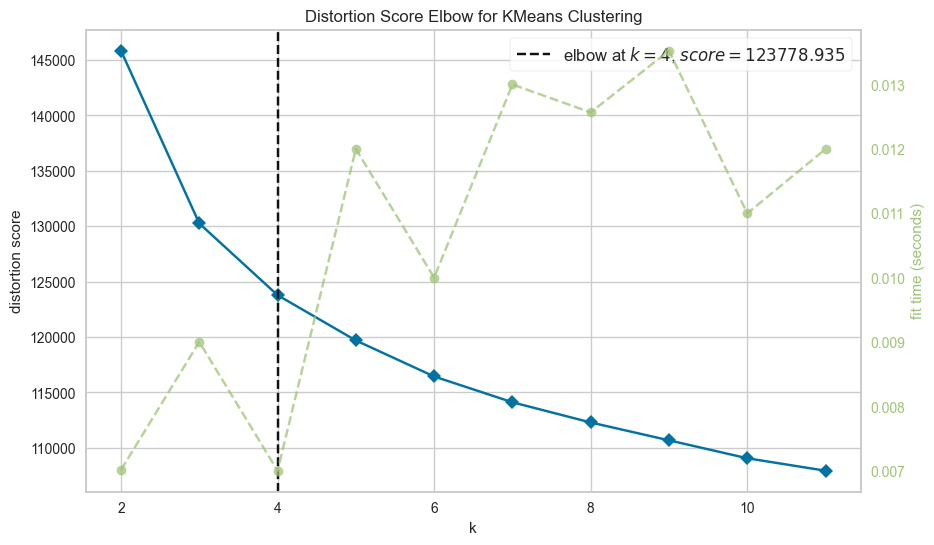

In [102]:
X_scaled = clustering_analysis(orange_variables, weights)

Les résultats obtenus avec ces 3 méthodes sont assez intéressants. La méthode **Elbow** a l'air d'indiquer un résultat optimal avec 4 clusters, alors que le **silhouette score** indique un meilleur résultat à 2 clusters, et le **Calinski-Harabasz score** à 8 clusters. Ceci est dû au fait que ce sont des heuristiques, donc le résultat peut beaucoup varier entre les différentes méthodes.

Comparer nos résultats à d'autres méthodes, par exemple la méthode du dendrogramme vue en cours.

Nous allons, de ce fait, définir la matrice de distances pondérée par les poids des individus pour la construction de notre dendrogramme (avec scipy).

In [103]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import euclidean, squareform
from tqdm import tqdm

In [104]:
def weighted_distance_matrix(X_scaled: pd.DataFrame, weights: np.ndarray):
    n_samples = X_scaled.shape[0]
    distance_matrix = np.zeros((n_samples, n_samples))

    for i in tqdm(range(n_samples)):
        for j in range(i + 1, n_samples):
            distance = euclidean(X_scaled[i] * weights[i], X_scaled[j] * weights[j])
            distance_matrix[i, j], distance_matrix[j, i] = distance, distance
    return distance_matrix

In [105]:
weighted_distances = weighted_distance_matrix(X_scaled, weights)
weighted_distances.shape

100%|██████████| 5000/5000 [01:40<00:00, 49.58it/s] 


(5000, 5000)

In [106]:
condensed_weighted_distances = squareform(weighted_distances)
condensed_weighted_distances.shape

(12497500,)

Nous procédons maintenant à un regroupement hiérarchique/agglomératif.

In [107]:
Z = linkage(condensed_weighted_distances, method='ward')
Z.shape

(4999, 4)

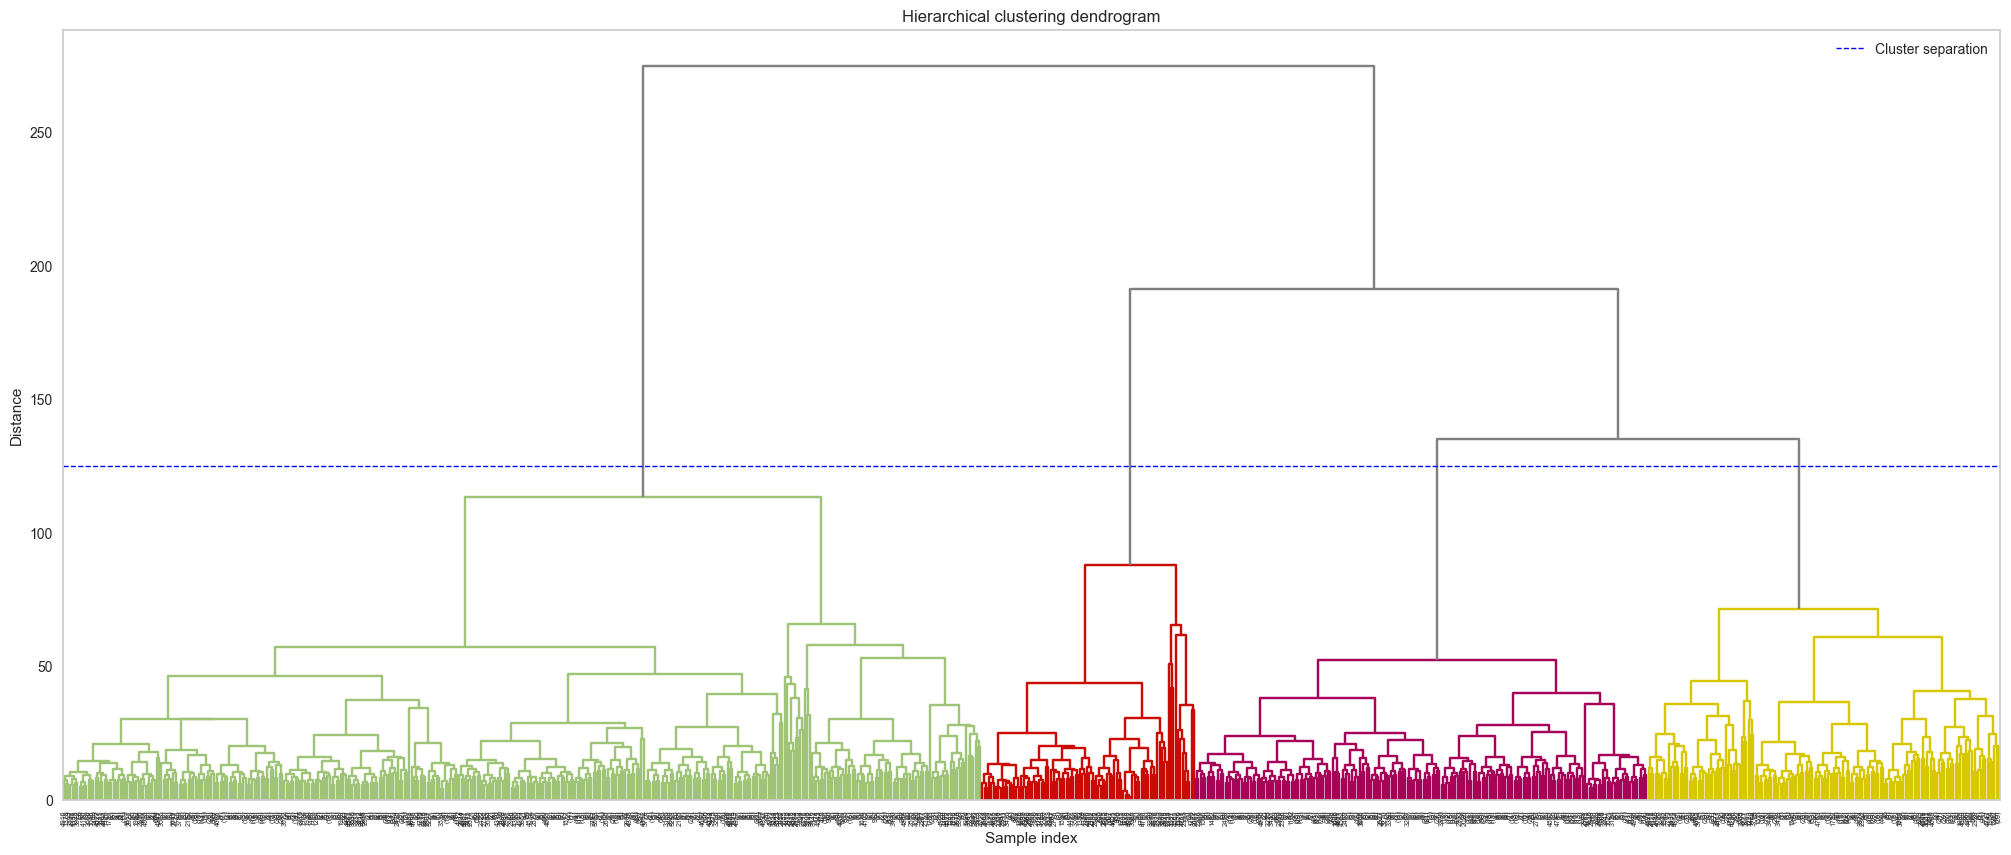

In [108]:
plt.figure(figsize=(25, 10))
dendrogram(
    Z,
    orientation='top',
    color_threshold=125,
    above_threshold_color='grey',
    truncate_mode = 'level',
    p=10,
    show_contracted=True
)
plt.title('Hierarchical clustering dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.axhline(y=125, c='blue', lw=1, linestyle='dashed', label='Cluster separation')
plt.legend()
plt.grid(False)
plt.show()

Au vu de notre étude et de la figure présente, on choisit ici 4 clusters.

In [109]:
nb_cluster = 4

Après étude, nous avons vu que le meilleur nombre clusters à utiliser dans notre cas est 4. Assignons donc à chaque sample de notre dataset son cluster (avec KMeans).

Assignons donc maintenant chacun des échantillons à sa classe parmis 4 clusters possibles avec KMeans (pondéré).

In [110]:
kmeans = KMeans(n_clusters=nb_cluster, random_state=1)
kmeans.fit(X_scaled, sample_weight=weights)

KMeans(n_clusters=4, random_state=1)

In [111]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=orange_variables.columns)

global_mean = X_scaled.mean(axis=0)

importance_per_cluster = abs(centroids - global_mean)

top_features_per_cluster = {}

for cluster_id in range(nb_cluster):
    top_vars = importance_per_cluster.loc[cluster_id].nlargest(5).index.tolist()
    top_features_per_cluster[f"Cluster {cluster_id}"] = top_vars

for cluster, features in top_features_per_cluster.items():
    print(f"{cluster} : {features}")

Cluster 0 : ['A9_8_slice', 'A9_3_slice', 'A9_4_slice', 'A9_7_slice', 'A9_10_slice']
Cluster 1 : ['A11_8_slice', 'A11_5_slice', 'A11_11_slice', 'A11_7_slice', 'A11_10_slice']
Cluster 2 : ['A11_5_slice', 'A11_7_slice', 'A11_10_slice', 'A11_3_slice', 'A11_1_slice']
Cluster 3 : ['A9_3_slice', 'A9_8_slice', 'A9_4_slice', 'A9_1_slice', 'A9_10_slice']


In [112]:
orange_variables['cluster'] = kmeans.labels_
orange_variables

,A11,A9_1_slice,A9_2_slice,A9_3_slice,A9_4_slice,A9_5_slice,A9_6_slice,A9_7_slice,A9_8_slice,A9_9_slice,A9_10_slice,A9_11_slice,A9_12_slice,A9_13_slice,A9_14_slice,A9_15_slice,A9_16_slice,A10_1_slice,A10_2_slice,A10_3_slice,A10_4_slice,A10_5_slice,A10_6_slice,A10_7_slice,A10_8_slice,A11_1_slice,A11_2_slice,A11_3_slice,A11_4_slice,A11_5_slice,A11_6_slice,A11_7_slice,A11_8_slice,A11_9_slice,A11_10_slice,A11_11_slice,A11_12_slice,A11_13_slice,cluster
0,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1
2,1,3,2,2,2,3,2,2,2,2,2,2,3,2,3,2,2,2,2,3,2,2,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0
3,1,1,2,2,2,3,2,3,2,1,2,1,3,3,1,2,3,2,2,3,2,2,3,2,3,2,2,1,2,1,2,3,3,3,2,2,1,2,0
4,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,3,2,3,4,3,2,2,2,1,2,1,3,4,1,2,2,1,1,3,1,1,4,1,2,1,1,1,2,1,2,1,1,1,1,1,1,1,1
4996,0,2,3,4,3,3,2,4,2,3,2,1,2,3,2,2,3,1,2,3,2,1,3,3,3,3,2,2,2,2,3,2,2,2,2,3,2,4,3
4997,0,3,4,4,3,2,2,4,4,3,3,2,4,3,3,3,4,2,2,2,2,2,2,2,2,2,3,3,3,2,3,3,3,2,3,3,2,3,3
4998,0,3,3,4,3,3,2,3,3,2,2,2,4,4,3,3,4,2,2,3,2,2,3,2,2,2,2,2,3,3,2,3,2,3,2,2,1,3,3


In [113]:
orange_variables.to_csv('../data/orange_with_labels.csv', sep=';')

Regardons maintenant la distrubution du nombre de points par cluster et étudions les variances inter et intra clusters.

In [114]:
def describe_cluster_variances(variables):
    for cluster in variables['cluster'].unique():
        nb_points = len(variables[variables['cluster'] == cluster])
        print(f"Cluster {cluster}: {nb_points} points")

    cluster_grouped = variables.groupby('cluster')

    print("\n=== Variance intra-cluster ===")
    display(cluster_grouped.var())

    print("\n=== Mean variance intra-cluster per cluster ===")
    display(cluster_grouped.var().mean(axis=1))

    print("=== Variance inter-cluster ===")
    variance_inter_cluster = cluster_grouped.mean().var().reset_index()
    variance_inter_cluster.columns = ["Feature", "Variance"]
    display(variance_inter_cluster.T)

In [115]:
describe_cluster_variances(orange_variables)

Cluster 0: 2116 points
Cluster 1: 1149 points
Cluster 3: 1419 points
Cluster 2: 316 points

=== Variance intra-cluster ===


,A11,A9_1_slice,A9_2_slice,A9_3_slice,A9_4_slice,A9_5_slice,A9_6_slice,A9_7_slice,A9_8_slice,A9_9_slice,A9_10_slice,A9_11_slice,A9_12_slice,A9_13_slice,A9_14_slice,A9_15_slice,A9_16_slice,A10_1_slice,A10_2_slice,A10_3_slice,A10_4_slice,A10_5_slice,A10_6_slice,A10_7_slice,A10_8_slice,A11_1_slice,A11_2_slice,A11_3_slice,A11_4_slice,A11_5_slice,A11_6_slice,A11_7_slice,A11_8_slice,A11_9_slice,A11_10_slice,A11_11_slice,A11_12_slice,A11_13_slice
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.140942,0.288599,0.439590,0.439056,0.445390,0.567003,0.375007,0.791669,0.370804,0.418890,0.367661,0.339480,0.417287,0.657892,0.289315,0.355495,0.561017,0.227670,0.275321,0.393442,0.242469,0.214564,0.440221,0.297414,0.624128,0.244461,0.210884,0.228894,0.363582,0.214290,0.342607,0.232523,0.277893,0.306797,0.213065,0.268834,0.279209,0.387218
1,0.097039,0.333726,0.580091,0.623540,0.555055,0.884014,0.612623,0.768097,0.431364,0.426349,0.436227,0.235357,0.641176,0.913838,0.263245,0.430270,0.681291,0.162577,0.294995,0.697351,0.379192,0.158429,0.896177,0.444357,0.648516,0.241483,0.243076,0.161689,0.307491,0.154299,0.250280,0.180772,0.245922,0.378564,0.193572,0.311980,0.233440,0.346126
2,0.241139,0.474101,0.270555,0.228360,0.205465,0.900141,0.901226,0.409122,0.302863,0.847418,0.434911,0.716576,0.264125,0.281656,0.400914,0.474774,0.462236,0.710307,0.896715,0.748031,0.604501,0.711865,0.934539,0.660559,0.635403,0.532811,0.563261,0.512276,0.641511,0.463613,0.832309,0.437372,0.350683,0.320625,0.487965,0.357916,0.525809,0.376964
3,0.207947,0.472276,0.384818,0.371682,0.407182,0.642003,0.510283,0.713696,0.428701,0.699899,0.501744,0.589983,0.353981,0.516776,0.468520,0.496210,0.587784,0.208737,0.286487,0.408795,0.386747,0.198585,0.487102,0.430622,0.717031,0.348185,0.339547,0.338634,0.453448,0.316419,0.442988,0.352405,0.399202,0.397503,0.372807,0.440629,0.483292,0.557816



=== Mean variance intra-cluster per cluster ===


cluster
0    0.356594
1    0.416937
2    0.529490
3    0.440012
dtype: float64

=== Variance inter-cluster ===


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
Feature,A11,A9_1_slice,A9_2_slice,A9_3_slice,A9_4_slice,A9_5_slice,A9_6_slice,A9_7_slice,A9_8_slice,A9_9_slice,A9_10_slice,A9_11_slice,A9_12_slice,A9_13_slice,A9_14_slice,A9_15_slice,A9_16_slice,A10_1_slice,A10_2_slice,A10_3_slice,A10_4_slice,A10_5_slice,A10_6_slice,A10_7_slice,A10_8_slice,A11_1_slice,A11_2_slice,A11_3_slice,A11_4_slice,A11_5_slice,A11_6_slice,A11_7_slice,A11_8_slice,A11_9_slice,A11_10_slice,A11_11_slice,A11_12_slice,A11_13_slice
Variance,0.047412,0.640656,0.553634,0.617571,0.674459,0.033055,0.213134,0.743672,0.742333,0.454714,0.58982,0.715733,0.403888,0.539442,0.792587,0.569459,0.532417,0.41611,0.225263,0.046918,0.425572,0.410948,0.046376,0.454789,0.543976,0.640075,0.600205,0.72413,0.589726,0.789088,0.46455,0.79182,0.812762,0.6867,0.792047,0.763968,0.716182,0.854229


### Exploitation des résultats

**1. Répartition des points par cluster**

Le cluster 0 est le plus grand, représentant la majorité des points, tandis que le cluster 2 est le plus petit, ce qui peut indiquer une concentration de points spécifiques ou une population plus rare.

**2. Variance intra-cluster**

- Le cluster 0, malgré sa taille importante, conserve une variance relativement faible pour la plupart des variables. Il est alors possible d'affirmer que cela reflète une cohérence interne plus importante.
- Les cluster 1 et 3 ont eux une variance plutôt modérée
- Le cluster 2 est celui qui présente le plus de variance intra classe en moyenne, avec quelques cas tels que `A9_6_slice` (0.901226) et `A10_6_slice` (0.934539) indiquant des différences plus marquées entre les points dans ces dimensions. Cela pourrait indiquer la présence d'un groupe marginal.

Ces résultats soulignent que certains clusters sont bien définis (faibles variances) tandis que d'autres intègrent des points plus diversifiés comme avec le cluster 2 en particulier.

**3. Variance inter-cluster**

Les variables avec des variances inter-cluster élevées, comme `A9_7_slice` (0.743672), `A9_8_slice` (0.742333), et `A11_13_slice` (0.854229), montrent une forte discrimination entre les clusters.

D'un autre coté, certaines variables telles que `A10_6_slice` (0.046376), affichent une variance faible, indiquant qu'elles ne contribuent que très peu à la différenciation entre les clusters.

In [116]:
m = 0
for i in range(nb_cluster):
  tmp = (orange_variables[orange_variables["cluster"] == i].var() / orange_variables.var()).mean()
  print(f"Cluster {i} - var intra clusters / var inter clusters: {tmp}")
  m += tmp

print(f"\nMean cluster: {m / nb_cluster}")

Cluster 0 - var intra clusters / var inter clusters: 0.5528453040948026
Cluster 1 - var intra clusters / var inter clusters: 0.6352556433672017
Cluster 2 - var intra clusters / var inter clusters: 0.912067760789733
Cluster 3 - var intra clusters / var inter clusters: 0.6964853523588754

Mean cluster: 0.6991635151526532


#### Visualisation

Définition d'une fonction d'affichage des clusters en 3D avec nos 4 clusters représenté par des couleurs différentes.

Pour ce faire, nous allons réduire la dimensionnalité de nos données avec une PCA avant le clustering.

In [117]:
def pca_analysis(X: pd.DataFrame):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X_scaled)
    df_pca = pd.DataFrame(data=X_pca, columns=["PCA1", "PCA2", "PCA3"])
    print(f"PCA explained variance: {pca.explained_variance_ratio_}\n")

    return df_pca, pca

In [118]:
column_names = orange_variables.columns[:-1]
orange_variables_without_label = orange_variables.drop(columns=['cluster'])

df_pca, pca = pca_analysis(orange_variables_without_label)

PCA explained variance: [0.39306429 0.06976543 0.04793428]



### Visualization

In [119]:
def visualize_pca_clusters(df_pca: pd.DataFrame, n_clusters: int):
    kmeans = KMeans(n_clusters=n_clusters, random_state=1)
    labels = kmeans.fit_predict(df_pca)

    # 2 rows and 2 columns subplot
    fig = make_subplots(
        rows=2, cols=2,
        specs=[
            [{'type': 'scatter3d'}, {'type': 'scatter'}],
            [{'type': 'scatter'}, {'type': 'scatter'}]
        ],
        subplot_titles=(
            '3D PCA plot (PC1 vs PC2 vs PC3)',
            '2D PCA plot (PC1 vs PC2)',
            '2D PCA plot (PC1 vs PC3)',
            '2D PCA plot (PC2 vs PC3)'
        )
    )

    # 3D plot
    for i in range(n_clusters):
        mask = labels == i
        fig.add_trace(
            go.Scatter3d(
                x=df_pca["PCA1"][mask],
                y=df_pca["PCA2"][mask],
                z=df_pca["PCA3"][mask],
                mode='markers',
                name=f'Cluster {i}',
                showlegend=True,
                hovertemplate=(
                    'PC1: %{x:.2f}<br>' +
                    'PC2: %{y:.2f}<br>' +
                    'PC3: %{z:.2f}<br>' +
                    '<extra></extra>'
                ),
            ),
            row=1, col=1
        )

    fig.update_scenes(
        camera=dict(
            up=dict(x=0, y=0, z=1),
            center=dict(x=0, y=0, z=0),
            eye=dict(x=1.2, y=1.2, z=1.2)
        )
    )

    # PC1 vs PC2
    for i in range(n_clusters):
        mask = labels == i
        fig.add_trace(
            go.Scatter(
                x=df_pca["PCA1"][mask],
                y=df_pca["PCA2"][mask],
                mode='markers',
                name=f'Cluster {i}',
                showlegend=False,
                hovertemplate=(
                    'PC1: %{x:.2f}<br>' +
                    'PC2: %{y:.2f}<br>' +
                    '<extra></extra>'
                ),
            ),
            row=1, col=2
        )

    # PC1 vs PC3
    for i in range(n_clusters):
        mask = labels == i
        fig.add_trace(
            go.Scatter(
                x=df_pca["PCA1"][mask],
                y=df_pca["PCA3"][mask],
                mode='markers',
                name=f'Cluster {i}',
                showlegend=False,
                hovertemplate=(
                    'PC1: %{x:.2f}<br>' +
                    'PC3: %{z:.2f}<br>' +
                    '<extra></extra>'
                ),
            ),
            row=2, col=1
        )

    # PC2 vs PC3
    for i in range(n_clusters):
        mask = labels == i
        fig.add_trace(
            go.Scatter(
                x=df_pca["PCA2"][mask],
                y=df_pca["PCA3"][mask],
                mode='markers',

                name=f'Cluster {i}',
                showlegend=False,
                hovertemplate=(
                    'PC2: %{x:.2f}<br>' +
                    'PC3: %{y:.2f}<br>' +
                    '<extra></extra>'
                ),
            ),
            row=2, col=2
        )

    fig.update_layout(
        title=f'PCA visualization with {n_clusters} clusters<br>',
        height=1000,
        width=1200,
        showlegend=True,
    )

    fig.update_xaxes(title_text="PC1", row=1, col=2)
    fig.update_yaxes(title_text="PC2", row=1, col=2)
    fig.update_xaxes(title_text="PC1", row=2, col=1)
    fig.update_yaxes(title_text="PC3", row=2, col=1)
    fig.update_xaxes(title_text="PC2", row=2, col=2)
    fig.update_yaxes(title_text="PC3", row=2, col=2)

    return fig, labels

In [120]:
fig, labels = visualize_pca_clusters(df_pca=df_pca, n_clusters=nb_cluster)
fig.show()

**/!\ IMPORTANT /!\ :** La prévisualisation GitHub ne permet pas d'afficher les graphs interactifs générés avec Plotly. Veuillez ouvrir le notebook dans un environnemment approprié

Malgré quelques chevauchements, les groupes sont raisonnablement bien séparés, ce qui justifie le choix de 4 groupes comme optimal.

Nous cherchons maintenant à présent à décortiquer les composantes principales pour savoir les features princpales entrant en jeux dans la construction de cette réduction de dimensionalité.

In [121]:
pca_components = pd.DataFrame(pca.components_, columns=column_names, index=['PC1', 'PC2', 'PC3'])
pca_components

,A11,A9_1_slice,A9_2_slice,A9_3_slice,A9_4_slice,A9_5_slice,A9_6_slice,A9_7_slice,A9_8_slice,A9_9_slice,A9_10_slice,A9_11_slice,A9_12_slice,A9_13_slice,A9_14_slice,A9_15_slice,A9_16_slice,A10_1_slice,A10_2_slice,A10_3_slice,A10_4_slice,A10_5_slice,A10_6_slice,A10_7_slice,A10_8_slice,A11_1_slice,A11_2_slice,A11_3_slice,A11_4_slice,A11_5_slice,A11_6_slice,A11_7_slice,A11_8_slice,A11_9_slice,A11_10_slice,A11_11_slice,A11_12_slice,A11_13_slice
PC1,-0.071622,0.177353,0.169226,0.172070,0.175661,0.038047,0.095318,0.153170,0.183735,0.138210,0.170425,0.174754,0.152732,0.148190,0.187268,0.167572,0.151995,0.170828,0.126267,0.062832,0.156242,0.173229,-0.047144,0.156942,0.141504,0.179612,0.182664,0.194155,0.167001,0.199489,0.149576,0.196699,0.196296,0.182444,0.198642,0.191753,0.180285,0.182608
PC2,0.050946,0.217900,0.284272,0.303895,0.282655,0.019494,-0.040752,0.048946,0.224810,0.077080,0.224632,0.072672,0.273060,0.264781,0.037186,0.230842,0.132213,-0.143448,-0.077124,-0.048673,-0.135640,-0.126592,0.022416,0.007266,-0.087538,-0.202837,-0.185373,-0.164727,-0.137244,-0.165436,-0.200824,-0.152174,-0.135624,-0.117729,-0.090035,-0.084862,-0.124966,-0.127827
PC3,-0.093497,-0.174417,-0.024129,0.002529,0.020877,0.321705,0.130532,0.341888,-0.072096,0.147003,-0.058411,-0.003424,-0.050741,0.094129,-0.138093,-0.203035,0.209933,-0.028112,-0.150728,0.339775,0.020641,-0.142136,0.239268,-0.100520,0.377204,-0.137946,-0.130062,-0.105044,-0.147939,-0.084095,-0.147400,-0.008182,-0.057107,0.081567,0.018902,0.149079,0.128495,0.245768


In [122]:
for pc in ['PC1', 'PC2', 'PC3']:
    print(f"\n{pc} top 4 contributors:")
    print(pca_components.loc[pc].abs().nlargest(4))


PC1 top 4 contributors:
A11_5_slice     0.199489
A11_10_slice    0.198642
A11_7_slice     0.196699
A11_8_slice     0.196296
Name: PC1, dtype: float64

PC2 top 4 contributors:
A9_3_slice     0.303895
A9_2_slice     0.284272
A9_4_slice     0.282655
A9_12_slice    0.273060
Name: PC2, dtype: float64

PC3 top 4 contributors:
A10_8_slice    0.377204
A9_7_slice     0.341888
A10_3_slice    0.339775
A9_5_slice     0.321705
Name: PC3, dtype: float64


-----

# Clusterisation des 5000 individus en utilisant les variables en verte

Nous allons maintenant suivre le même procédé pour les variables vertes. Pour éviter de la redondance, nous allons seulement commenter nos différents résultats sans expliciter les choix d'utilisation des différentes stratégies utilisées.

In [149]:
green_columns = ['weight', 'A11', 'A12', 'A13', 'A14', 'A4', 'A5', 'A5bis', "A8_1_slice", "A8_2_slice","A8_3_slice","A8_4_slice", "B1_1_slice", "B1_2_slice","B2_1_slice","B2_2_slice","B3", "B4", "B6", "C1_1_slice","C1_2_slice","C1_3_slice", "C1_4_slice","C1_5_slice","C1_6_slice", "C1_7_slice", "C1_8_slice", "C1_9_slice"]

In [150]:
df_codes = pd.read_csv('../data/fic_epita_kantar_codes.csv', delimiter=';')

green_variables = df_codes[green_columns]
green_variables

,weight,A11,A12,A13,A14,A4,A5,A5bis,A8_1_slice,A8_2_slice,A8_3_slice,A8_4_slice,B1_1_slice,B1_2_slice,B2_1_slice,B2_2_slice,B3,B4,B6,C1_1_slice,C1_2_slice,C1_3_slice,C1_4_slice,C1_5_slice,C1_6_slice,C1_7_slice,C1_8_slice,C1_9_slice
0,2.501255,1,0,0,0,1,2.0,NaN,2,2,2,2,2,2,2,2,2,2,3,2,2,2,2,2,2,2,2,2
1,0.722914,1,0,0,0,1,5.0,NaN,2,0,0,0,2,2,2,2,3,3,3,4,4,4,4,4,4,4,4,4
2,1.039611,1,0,0,0,1,2.0,NaN,5,5,1,1,2,2,2,3,3,3,4,4,4,4,4,4,4,4,4,4
3,0.976590,1,1,1,0,1,1.0,NaN,2,3,2,1,4,3,4,3,3,4,4,4,4,5,5,5,5,5,4,4
4,0.812315,0,1,0,0,2,NaN,1.0,1,1,1,1,4,4,4,4,4,4,3,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.905997,1,0,1,0,3,NaN,1.0,5,6,5,1,4,4,4,4,4,4,4,4,4,5,5,5,5,5,4,5
4996,1.257884,0,1,0,0,2,NaN,1.0,1,3,1,0,4,4,4,4,3,4,2,4,5,5,5,5,5,5,5,5
4997,1.094695,0,1,0,0,2,NaN,2.0,1,1,1,1,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5
4998,2.022023,0,0,1,0,3,NaN,1.0,1,1,0,0,3,2,3,3,4,4,3,5,4,5,5,5,5,5,5,5


In [151]:
get_summary(green_variables).style.background_gradient(cmap='viridis_r', low=0.8)

,dtype,unique,missing,duplicates,min,max,avg,std dev
weight,float64,169,0,20,0.379603,5.969742,0.968387,0.434649
A11,int64,2,0,20,0.000000,1.000000,0.781800,0.413065
A12,int64,2,0,20,0.000000,1.000000,0.225000,0.417624
A13,int64,2,0,20,0.000000,1.000000,0.402200,0.490391
A14,int64,1,0,20,0.000000,0.000000,0.000000,0.000000
A4,int64,3,0,20,1.000000,3.000000,1.421600,0.714112
A5,float64,5,1443,20,1.000000,5.000000,2.326399,1.243436
A5bis,float64,4,3557,20,1.000000,4.000000,1.821206,0.987393
A8_1_slice,int64,36,0,20,0.000000,50.000000,5.122200,6.738067
A8_2_slice,int64,36,0,20,0.000000,50.000000,5.521400,7.001067


On remarque que plusieurs variables semblent manquer pour les features `A5` et `A5bis` qui correspondent respectivement aux question sur *"A5: Taille jardin"* et *Q042 - A5bis: Taille terrasse/balcon*. Ces questions ne sont posés qu'à un certain type d'individu. Pour ces question l'utilisateur à le choix entre 4 ou 5 réponses allant de 1 à 4 ou 5, nous faisons donc le choix de remplacer ici les Nan de ces 2 catégories par 0 pour bien distinguer les gens qui n'ont pas de jardin / terrasse des autres.

In [152]:
green_variables['A5'].fillna(0, inplace=True)
green_variables['A5bis'].fillna(0, inplace=True)

green_variables.to_csv('../data/green_var_file.csv', sep=';')

In [153]:
weights = green_variables['weight']

green_variables.drop(columns=["weight"], inplace=True)
green_variables

,A11,A12,A13,A14,A4,A5,A5bis,A8_1_slice,A8_2_slice,A8_3_slice,A8_4_slice,B1_1_slice,B1_2_slice,B2_1_slice,B2_2_slice,B3,B4,B6,C1_1_slice,C1_2_slice,C1_3_slice,C1_4_slice,C1_5_slice,C1_6_slice,C1_7_slice,C1_8_slice,C1_9_slice
0,1,0,0,0,1,2.0,0.0,2,2,2,2,2,2,2,2,2,2,3,2,2,2,2,2,2,2,2,2
1,1,0,0,0,1,5.0,0.0,2,0,0,0,2,2,2,2,3,3,3,4,4,4,4,4,4,4,4,4
2,1,0,0,0,1,2.0,0.0,5,5,1,1,2,2,2,3,3,3,4,4,4,4,4,4,4,4,4,4
3,1,1,1,0,1,1.0,0.0,2,3,2,1,4,3,4,3,3,4,4,4,4,5,5,5,5,5,4,4
4,0,1,0,0,2,0.0,1.0,1,1,1,1,4,4,4,4,4,4,3,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,0,1,0,3,0.0,1.0,5,6,5,1,4,4,4,4,4,4,4,4,4,5,5,5,5,5,4,5
4996,0,1,0,0,2,0.0,1.0,1,3,1,0,4,4,4,4,3,4,2,4,5,5,5,5,5,5,5,5
4997,0,1,0,0,2,0.0,2.0,1,1,1,1,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5
4998,0,0,1,0,3,0.0,1.0,1,1,0,0,3,2,3,3,4,4,3,5,4,5,5,5,5,5,5,5


### Préparation de la donnée et étude du nombre optimal de cluster

Nous reprenons ici la même méthode que pour les variables oranges.

Calculating clustering metrics for different numbers of clusters:
2 clusters - Silhouette score: 0.2777 | Calinski-Harabasz score: 1165.7279
3 clusters - Silhouette score: 0.1960 | Calinski-Harabasz score: 1083.3340
4 clusters - Silhouette score: 0.1756 | Calinski-Harabasz score: 961.6944
5 clusters - Silhouette score: 0.1768 | Calinski-Harabasz score: 896.9989
6 clusters - Silhouette score: 0.1667 | Calinski-Harabasz score: 803.5097
7 clusters - Silhouette score: 0.1434 | Calinski-Harabasz score: 726.5997
8 clusters - Silhouette score: 0.1346 | Calinski-Harabasz score: 665.6528
9 clusters - Silhouette score: 0.1379 | Calinski-Harabasz score: 626.9611
10 clusters - Silhouette score: 0.1540 | Calinski-Harabasz score: 589.9016
11 clusters - Silhouette score: 0.1355 | Calinski-Harabasz score: 553.1333


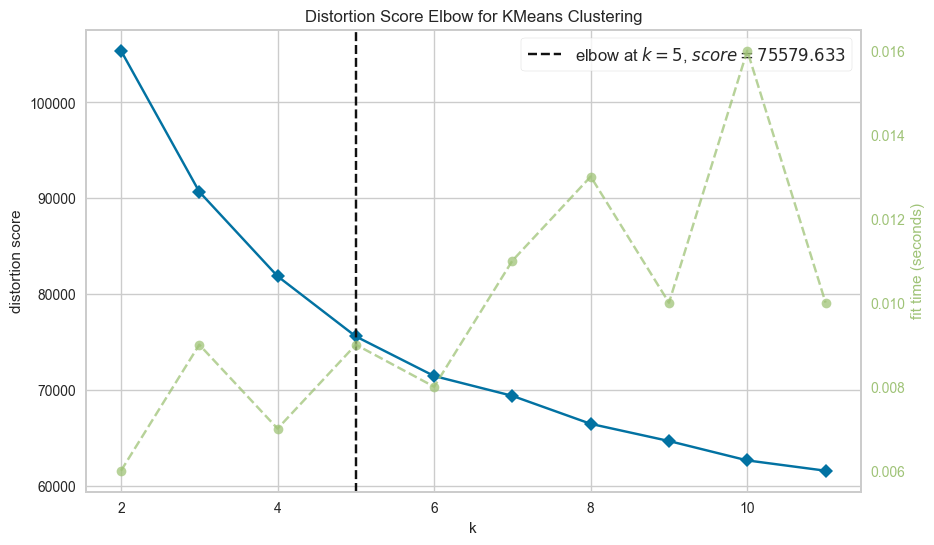

In [154]:
X_scaled = clustering_analysis(green_variables, weights)

In [136]:
weighted_distances = weighted_distance_matrix(X_scaled, weights)
weighted_distances.shape

100%|██████████| 5000/5000 [02:24<00:00, 34.60it/s] 


(5000, 5000)

In [155]:
condensed_weighted_distances = squareform(weighted_distances)
condensed_weighted_distances.shape

(12497500,)

In [156]:
Z = linkage(condensed_weighted_distances, method='ward')
Z.shape

(4999, 4)

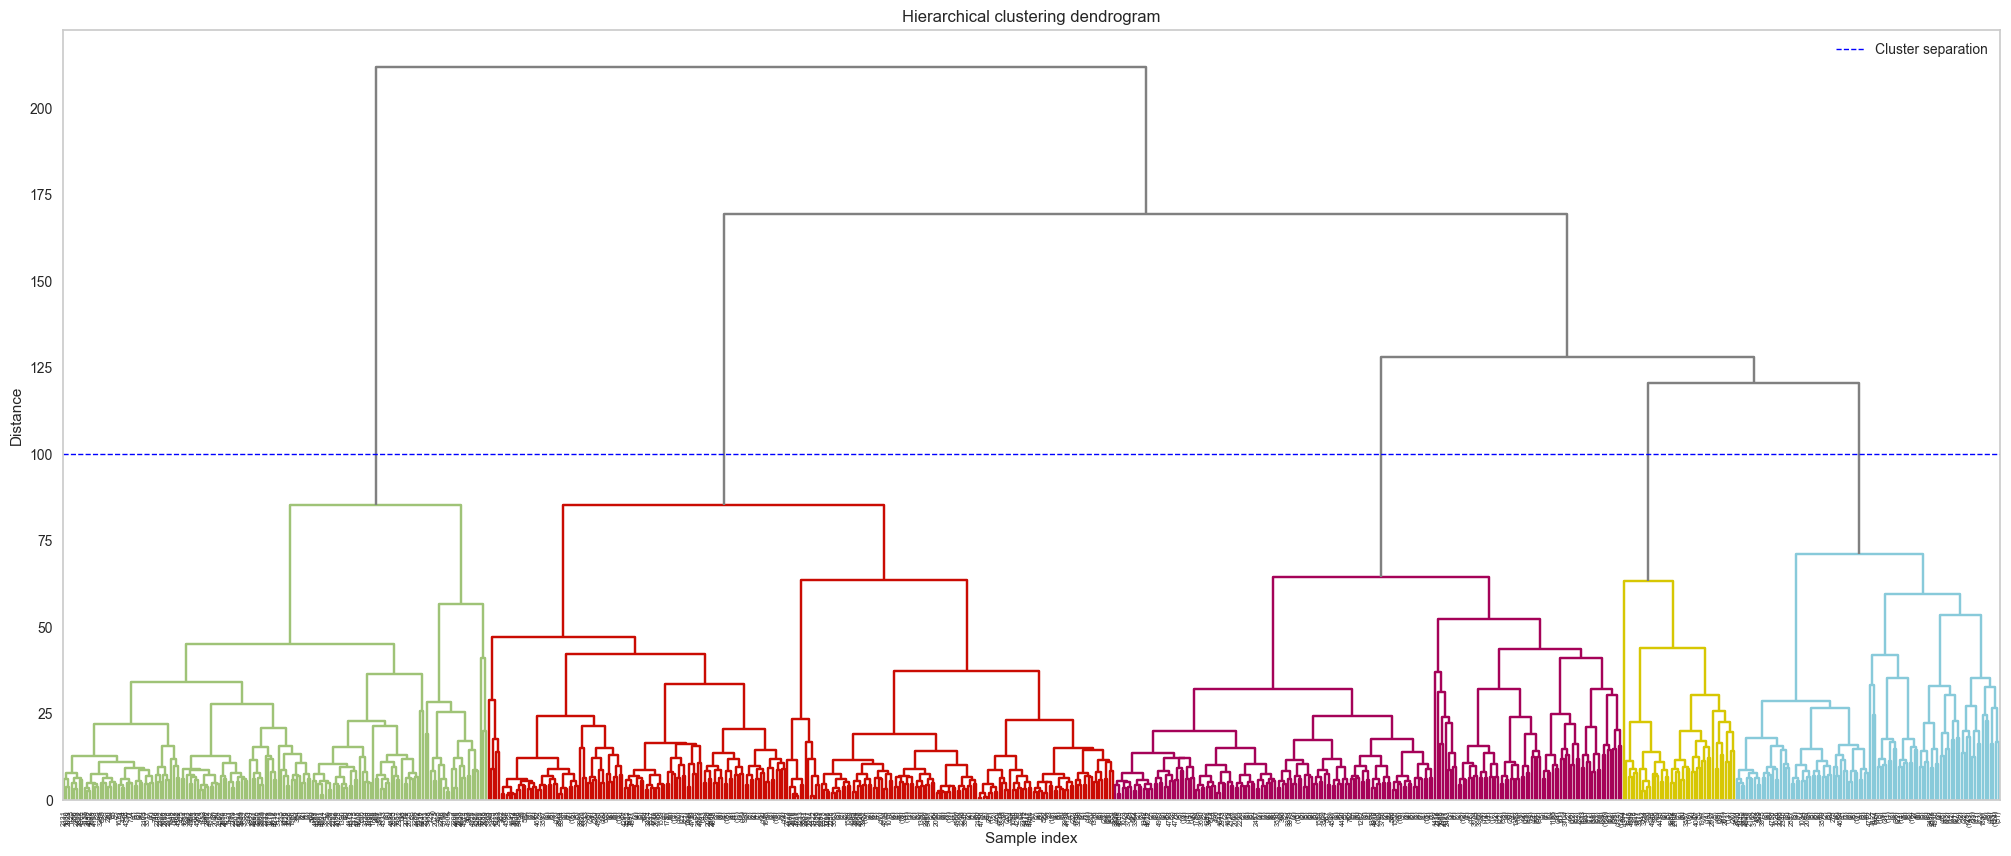

In [157]:
plt.figure(figsize=(25, 10))
dendrogram(
    Z,
    orientation='top',
    color_threshold=100,
    above_threshold_color='grey',
    truncate_mode = 'level',
    p=10,
    show_contracted=True
)
plt.title('Hierarchical clustering dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.axhline(y=100, c='blue', lw=1, linestyle='dashed', label='Cluster separation')
plt.legend()
plt.grid(False)
plt.show()

Au vu de notre étude et de la figure présente, on choisit ici 5 clusters.

In [158]:
nb_clusters = 5

In [159]:
kmeans = KMeans(n_clusters=nb_clusters, random_state=1)
kmeans.fit(X_scaled, sample_weight=weights)

KMeans(n_clusters=5, random_state=1)

In [160]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=green_variables.columns)

global_mean = X_scaled.mean(axis=0)

importance_per_cluster = abs(centroids - global_mean)

top_features_per_cluster = {}

for cluster_id in range(nb_clusters):
    top_vars = importance_per_cluster.loc[cluster_id].nlargest(5).index.tolist()
    top_features_per_cluster[f"Cluster {cluster_id}"] = top_vars

for cluster, features in top_features_per_cluster.items():
    print(f"{cluster} : {features}")

Cluster 0 : ['C1_1_slice', 'C1_9_slice', 'B2_2_slice', 'B2_1_slice', 'B1_2_slice']
Cluster 1 : ['A4', 'A5bis', 'A11', 'C1_1_slice', 'C1_9_slice']
Cluster 2 : ['A8_1_slice', 'A8_3_slice', 'A8_2_slice', 'A8_4_slice', 'A5']
Cluster 3 : ['C1_6_slice', 'C1_4_slice', 'C1_3_slice', 'C1_7_slice', 'C1_8_slice']
Cluster 4 : ['A4', 'A11', 'A5bis', 'A5', 'A12']


In [161]:
green_variables['cluster'] = kmeans.labels_
green_variables

,A11,A12,A13,A14,A4,A5,A5bis,A8_1_slice,A8_2_slice,A8_3_slice,A8_4_slice,B1_1_slice,B1_2_slice,B2_1_slice,B2_2_slice,B3,B4,B6,C1_1_slice,C1_2_slice,C1_3_slice,C1_4_slice,C1_5_slice,C1_6_slice,C1_7_slice,C1_8_slice,C1_9_slice,cluster
0,1,0,0,0,1,2.0,0.0,2,2,2,2,2,2,2,2,2,2,3,2,2,2,2,2,2,2,2,2,3
1,1,0,0,0,1,5.0,0.0,2,0,0,0,2,2,2,2,3,3,3,4,4,4,4,4,4,4,4,4,0
2,1,0,0,0,1,2.0,0.0,5,5,1,1,2,2,2,3,3,3,4,4,4,4,4,4,4,4,4,4,0
3,1,1,1,0,1,1.0,0.0,2,3,2,1,4,3,4,3,3,4,4,4,4,5,5,5,5,5,4,4,1
4,0,1,0,0,2,0.0,1.0,1,1,1,1,4,4,4,4,4,4,3,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,0,1,0,3,0.0,1.0,5,6,5,1,4,4,4,4,4,4,4,4,4,5,5,5,5,5,4,5,4
4996,0,1,0,0,2,0.0,1.0,1,3,1,0,4,4,4,4,3,4,2,4,5,5,5,5,5,5,5,5,4
4997,0,1,0,0,2,0.0,2.0,1,1,1,1,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,4
4998,0,0,1,0,3,0.0,1.0,1,1,0,0,3,2,3,3,4,4,3,5,4,5,5,5,5,5,5,5,4


In [162]:
green_variables.to_csv('../data/green_with_labels.csv', sep=';')

In [163]:
m = 0
for i in range(nb_clusters):
  tmp = (green_variables[green_variables["cluster"] == i].var() / green_variables.var()).mean()
  print(f"Cluster {i} - var intra clusters / var inter clusters: {tmp}")
  m += tmp

print(f"\nMean cluster: {m / nb_clusters}")

Cluster 0 - var intra clusters / var inter clusters: 0.6995774836912437
Cluster 1 - var intra clusters / var inter clusters: 0.36928559008711503
Cluster 2 - var intra clusters / var inter clusters: 1.0502606913983095
Cluster 3 - var intra clusters / var inter clusters: 1.088287537024232
Cluster 4 - var intra clusters / var inter clusters: 0.4574356331474005

Mean cluster: 0.7329693870696602


#### Clustering avec PCA
On va réduire la dimensionnalité de nos données avec PCA avant le clustering

In [164]:
df_pca, pca = pca_analysis(green_variables)

PCA explained variance: [0.29904823 0.16583642 0.10192997]



In [165]:
fig, labels = visualize_pca_clusters(df_pca, nb_clusters)
fig.show()
df_pca["cluster"] = labels

**/!\ IMPORTANT /!\ :** La prévisualisation GitHub ne permet pas d'afficher les graphs interactifs générés avec Plotly. Veuillez ouvrir le notebook dans un environnemment approprié

Les clusters semblent globalement bien définis sur les composantes PCA1 et PCA2, à l'exception de PCA3 pour le cluster 1, qui nécessiterait une analyse plus approfondie pour évaluer la dispersion et la qualité de cette dimension.